In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
!pip install sweetviz
import sweetviz as sv

import collections
# Counting the number of words
from collections import Counter
import time


import re  
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 51.0 MB/s eta 0:00:00
/kaggle/input/random-data-stream0/random_data_stream0.xlsx
/kaggle/input/test5-labeled/test5_all.xlsx
/kaggle/input/not-cs/not_cs_aware_cleaned_text.csv
/kaggle/input/labeled-data/labeled_data.xlsx
/kaggle/input/data-with-all-users-text-cleaned/data_with_all_users_text_cleaned.xlsx
/kaggle/input/data-labeled/data_labeled.csv


> prepare data labeled 1/0 for user embedings

because of the lack of user_ids in the tweets numbered 0 i again downloaded their data, now the file in laptop is random_data_stream0.xlsx, and it has to be text cleaned 
1. clean text
2. concat the 2 data
3. prepare for user embeddings
4. 

In [2]:
data_labeled_1_and_0 = pd.read_csv('/kaggle/input/data-labeled/data_labeled.csv')
#check if you have got any of nan values for the user id
nan_rows = data_labeled_1_and_0['user_id'].isna().sum()
print(nan_rows)

0


data_labeled_1_and_0: the data that has been manually labeled as rezuly of active learning. 
3284 rows × 26 columns
* 1932 => 1
* 1352 => 0


random_data_stream0 is the stream of unrelated tweets labeled 0, this has been updated with user_id column for user to vec embeddings
* 9922 rows × 17 columns



In [3]:
random_data_stream0 = pd.read_excel('/kaggle/input/random-data-stream0/random_data_stream0.xlsx')
random_data_stream0['label'] = 0
#check if you have got any of nan values for the user id
nan_rows = random_data_stream0['user_id'].isna().sum()
print(nan_rows)

0


concatenate the two datasets

In [4]:
#was already executed
data = pd.concat([data_labeled_1_and_0, random_data_stream0], ignore_index= True)
#data.to_excel('data_with_all_users_text_to_cleaned.xlsx', encoding = 'utf-8-sig')


In [5]:
data['label']

0        0.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
13201    0.0
13202    0.0
13203    0.0
13204    0.0
13205    0.0
Name: label, Length: 13206, dtype: float64

In [6]:
data= pd.read_excel('/kaggle/input/data-with-all-users-text-cleaned/data_with_all_users_text_cleaned.xlsx')

                                             |          | [  0%]   00:00 -> (? left)

/opt/conda/lib/python3.7/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 1603 (\N{ARABIC LETTER KAF}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/opt/conda/lib/python3.7/site-packages/sweetviz/graph.py:33: UserWarning: Matplotlib currently does not support Arabic natively.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/opt/conda/lib/python3.7/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 1610 (\N{ARABIC LETTER YEH}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/opt/conda/lib/python3.7/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 1608 (\N{ARABIC LETTER WAW}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/opt/conda/lib/python3.7/site-packages/sweetviz/graph.py:33: UserWarning: Glyph 1587 (\N{ARABIC LETTER SEEN}) missing from current font.
  figure.savefig(as_raw_bytes, format='png', transparent=True)
/opt/conda/


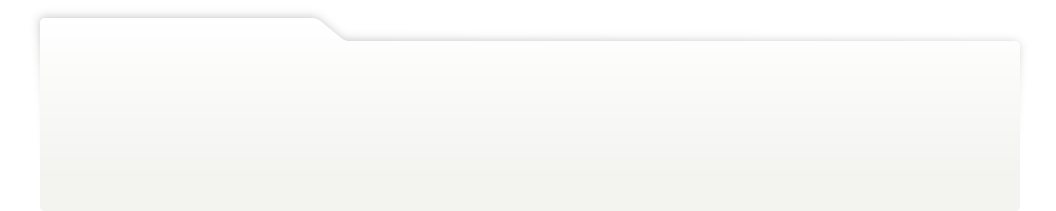
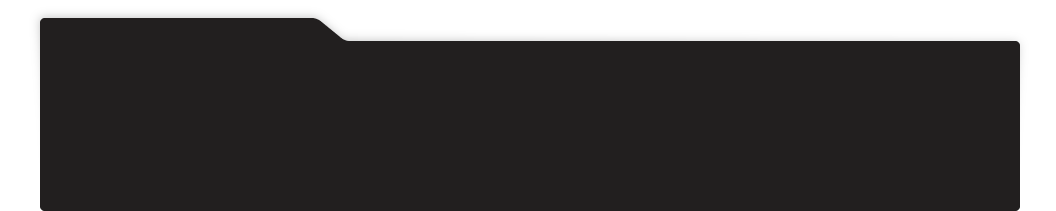
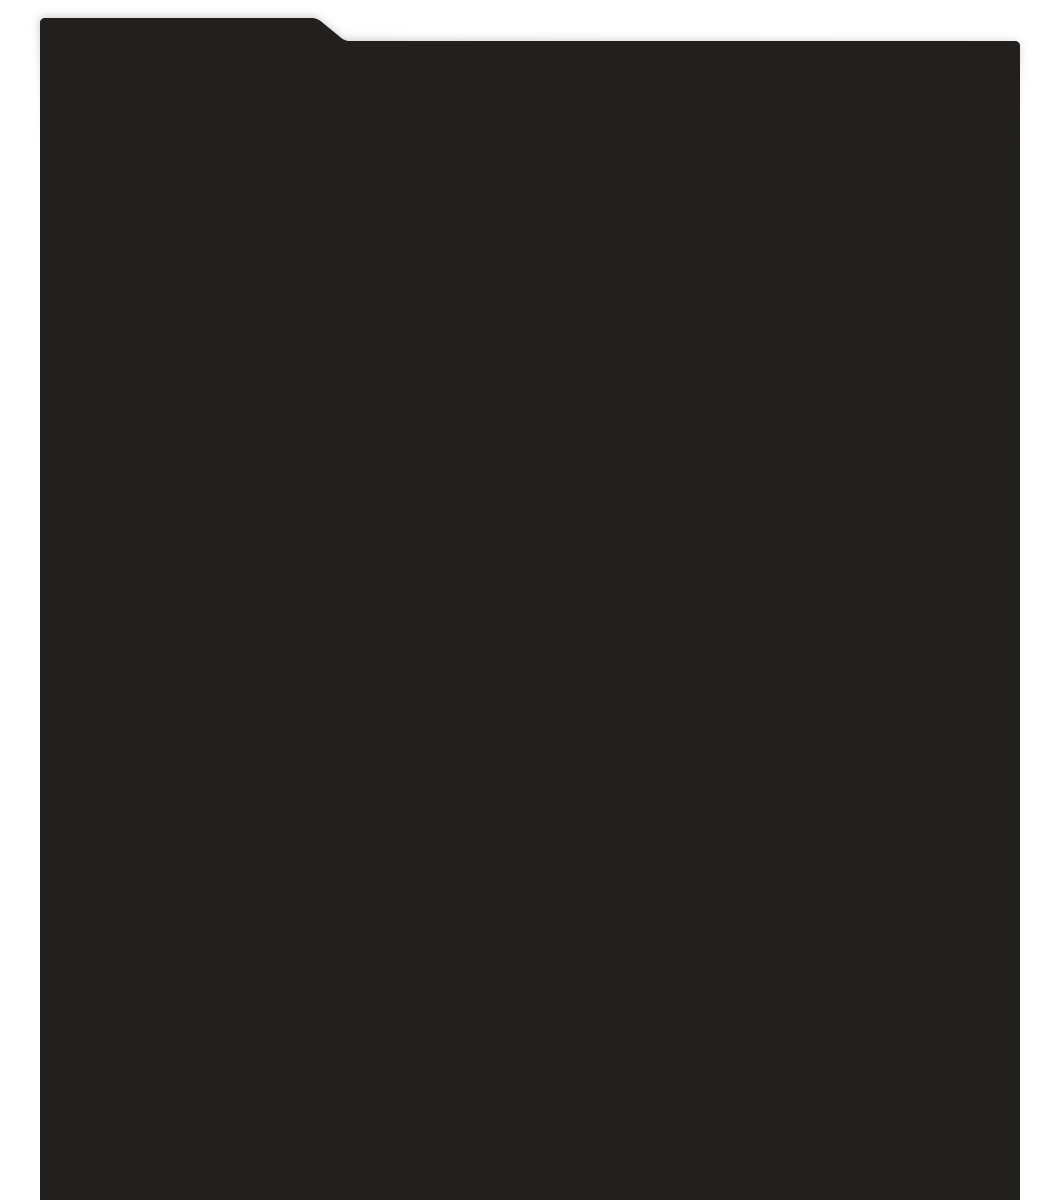
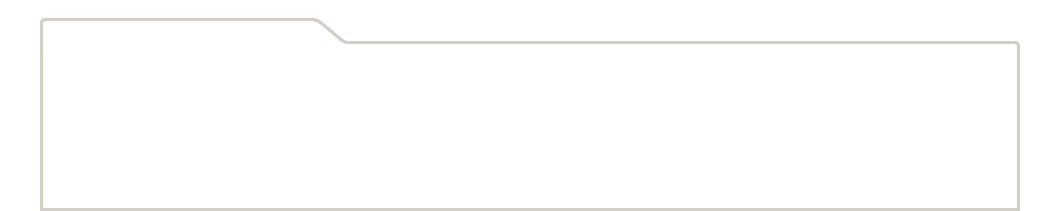
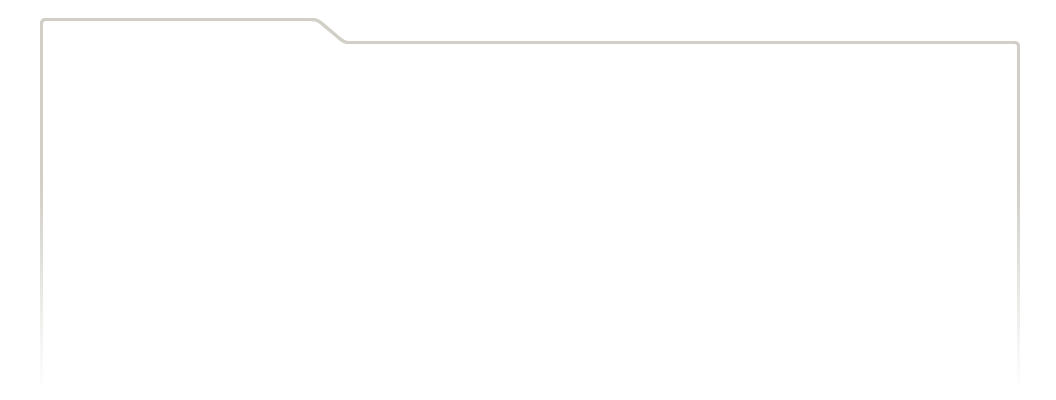
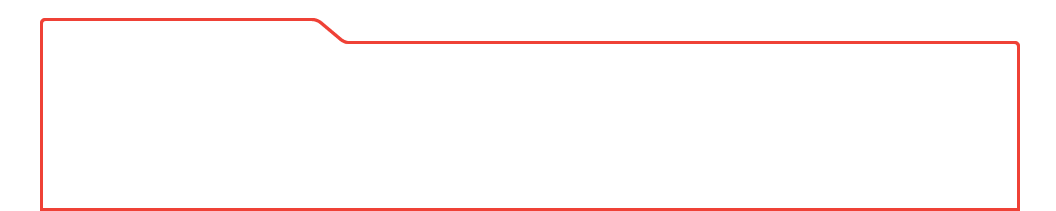
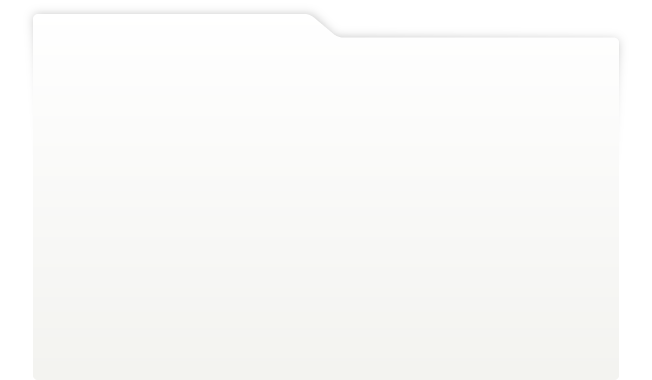
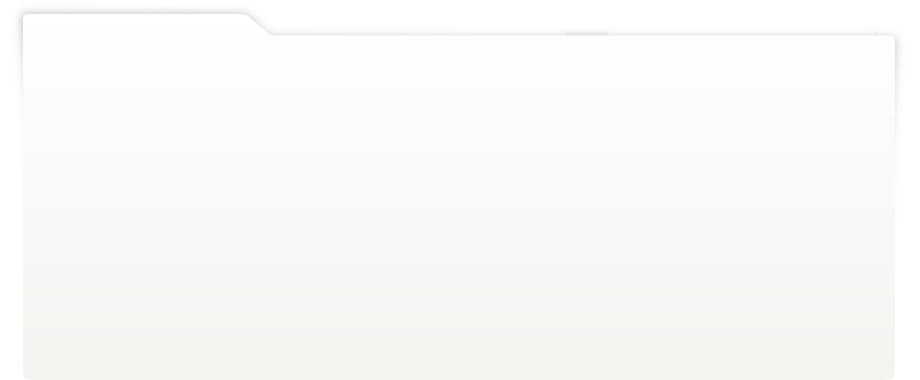
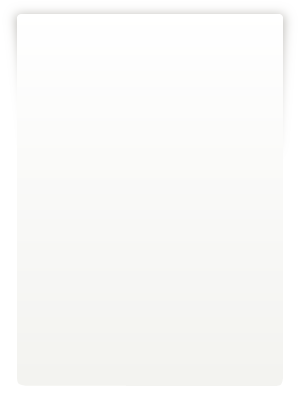
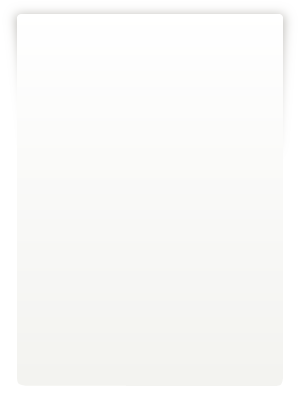
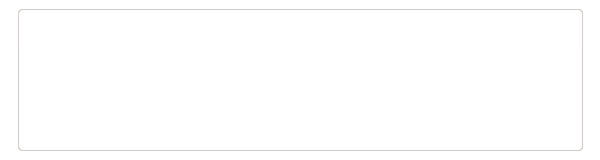
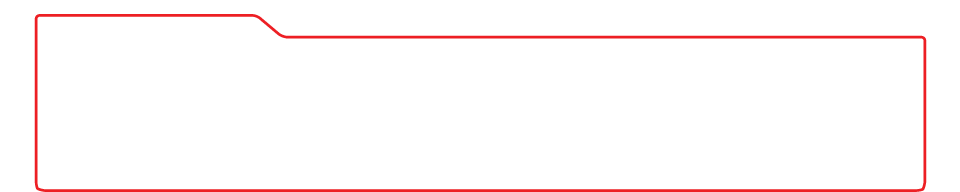
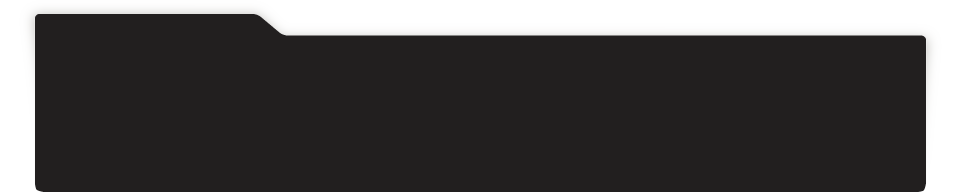
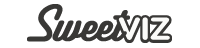
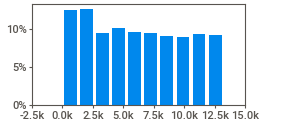
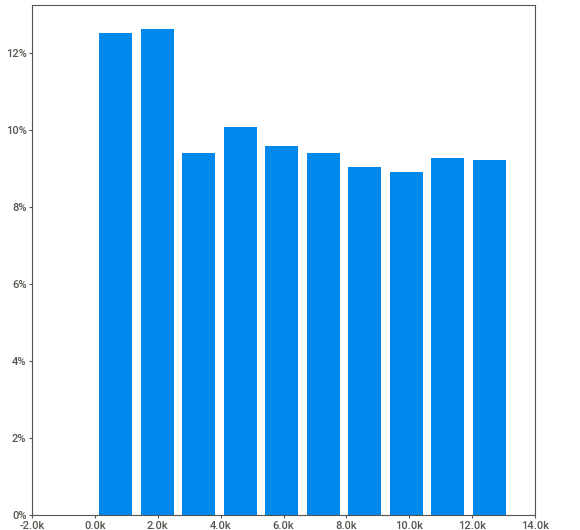
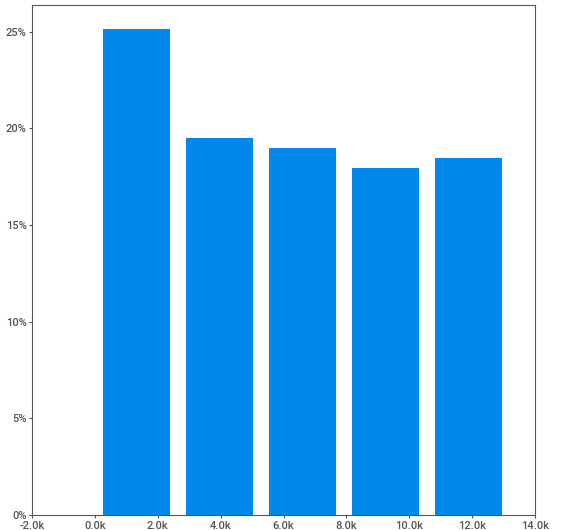
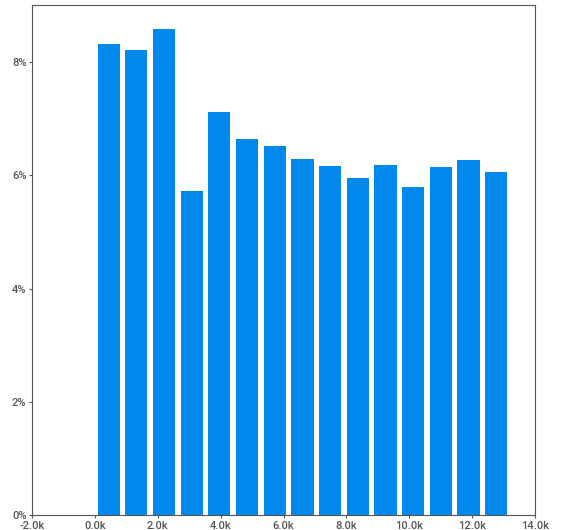
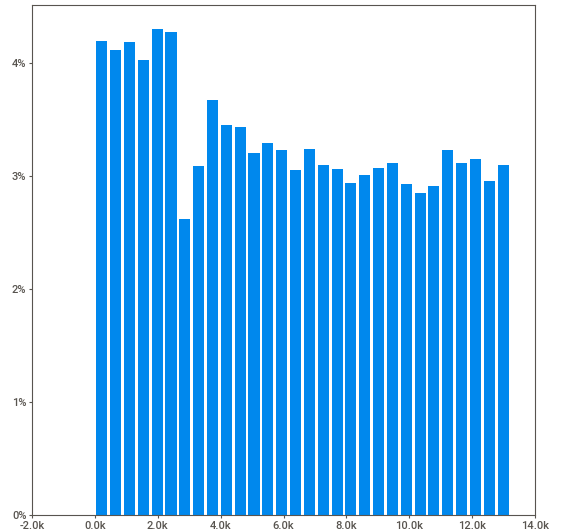
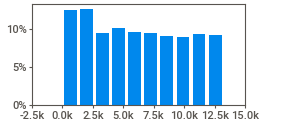
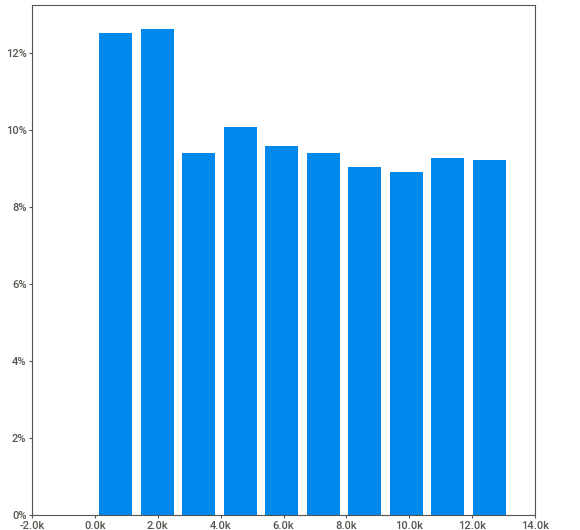
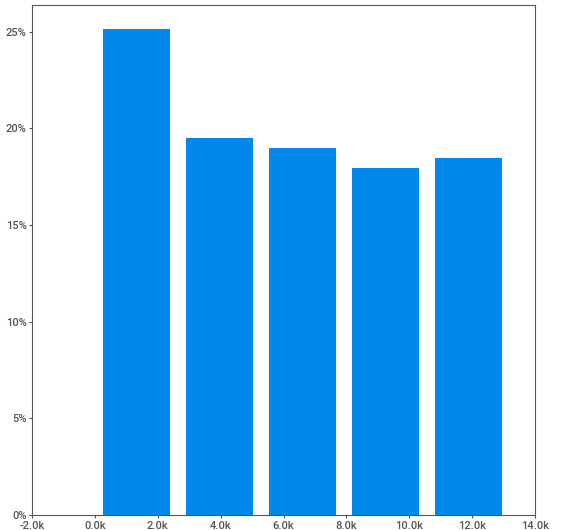
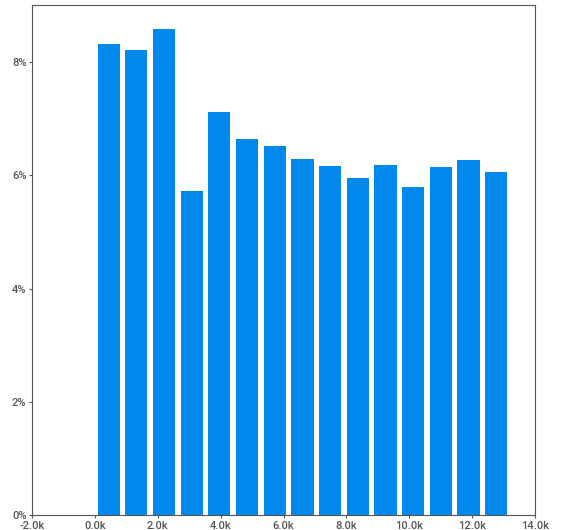
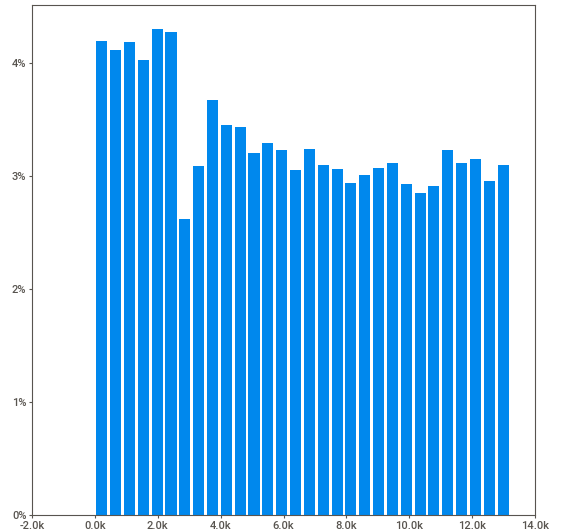
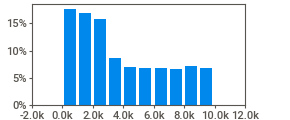
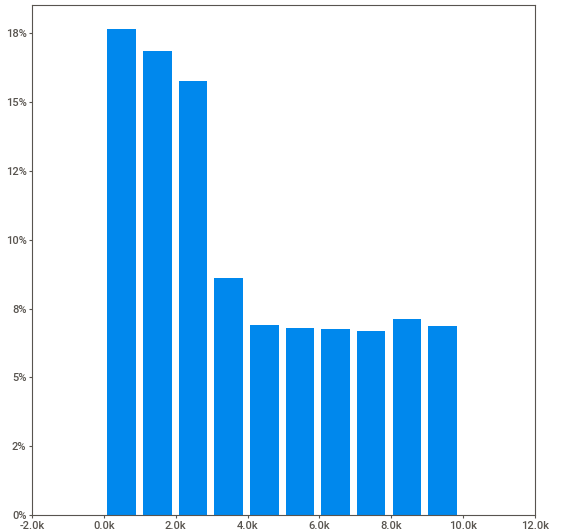
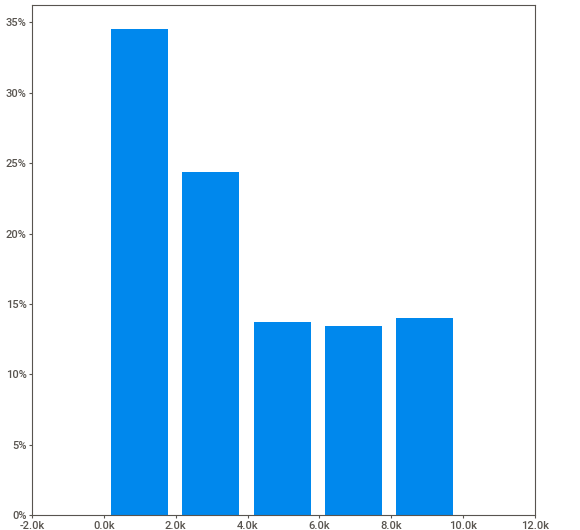
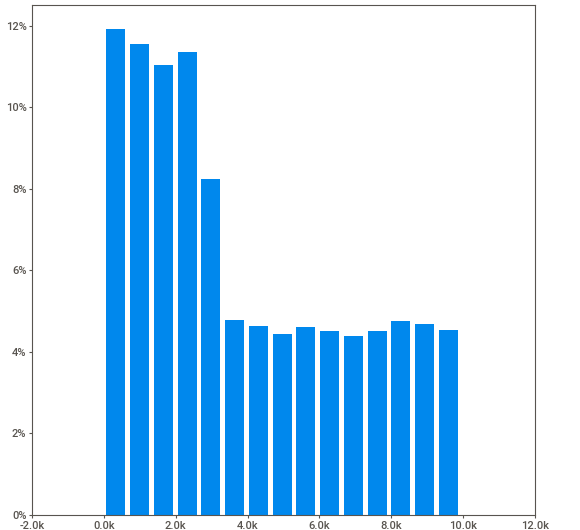
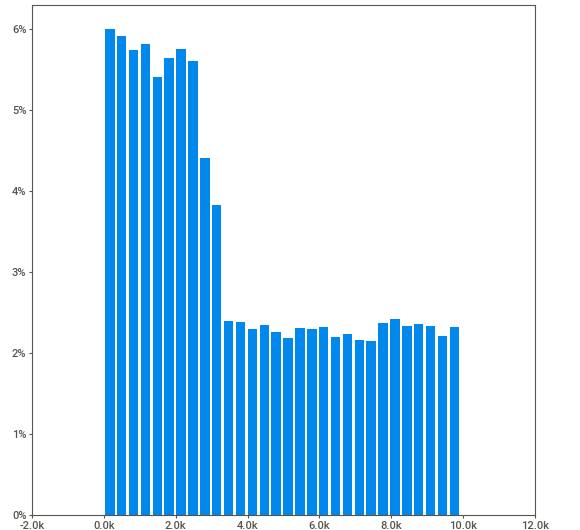
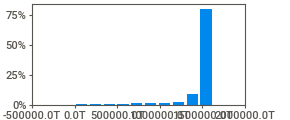
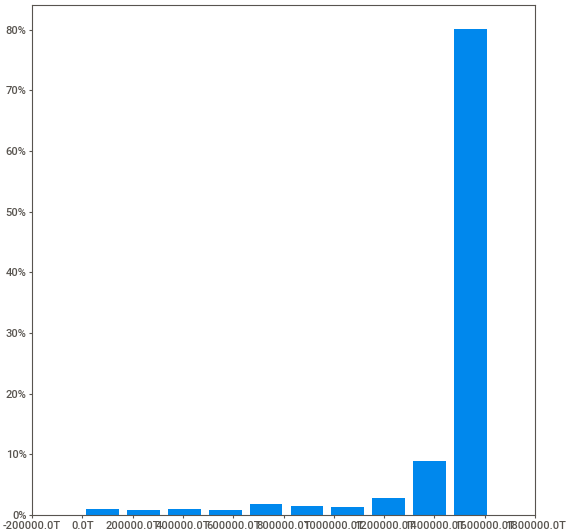
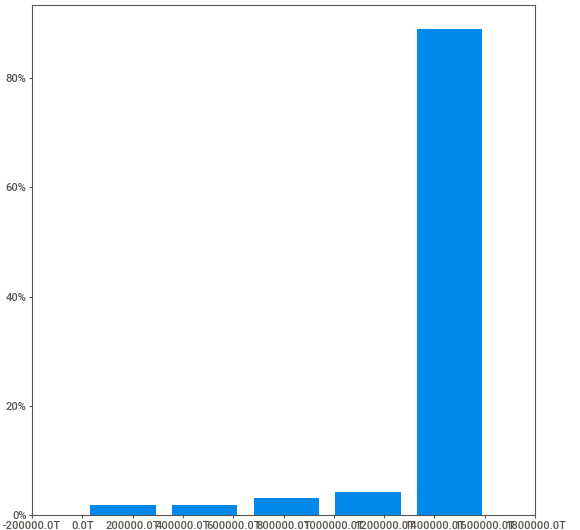
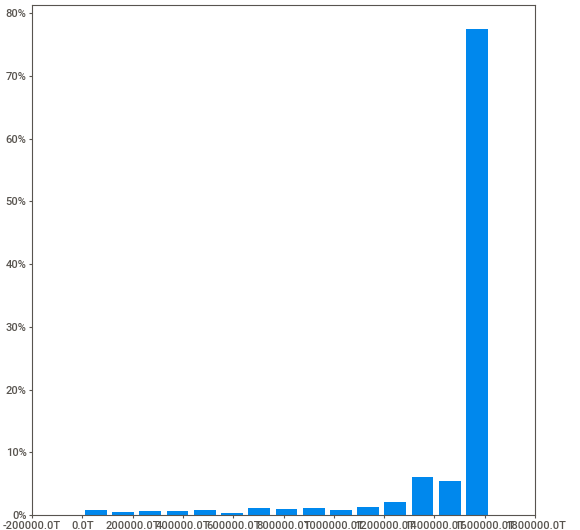
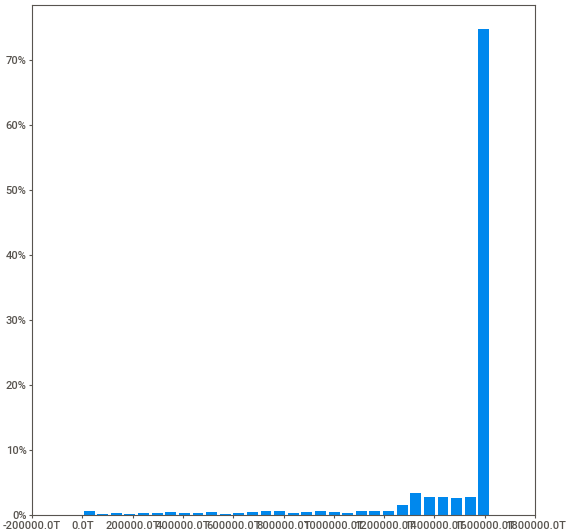
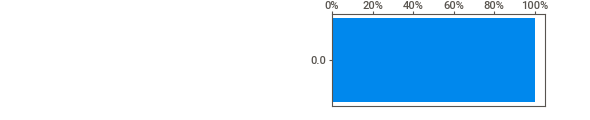
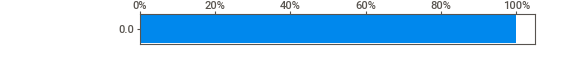
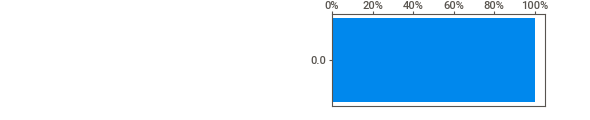
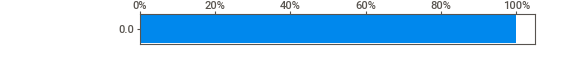
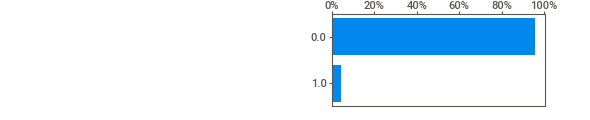
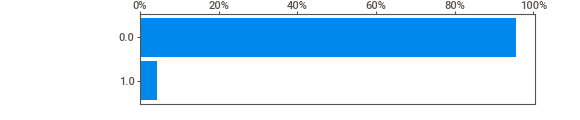
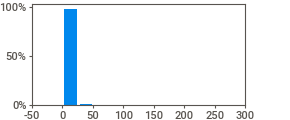
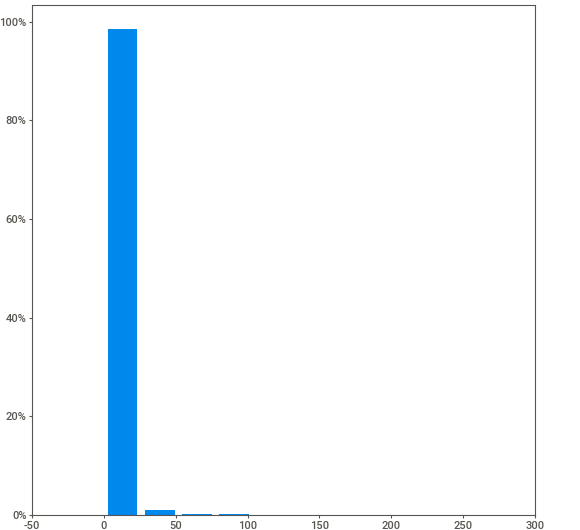
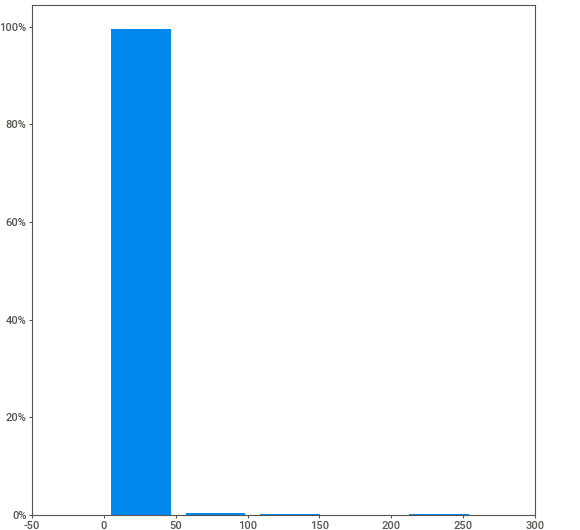
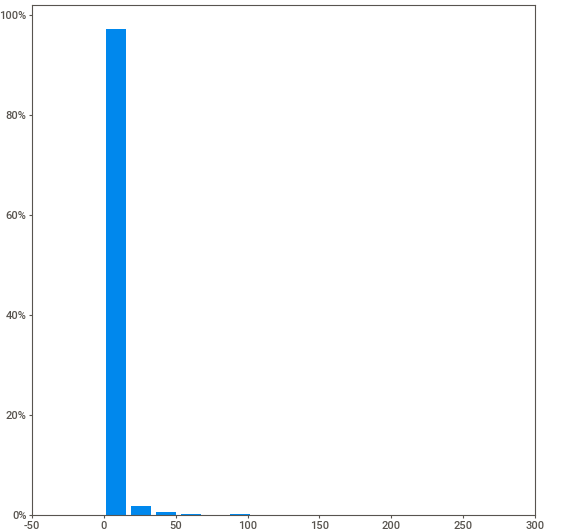
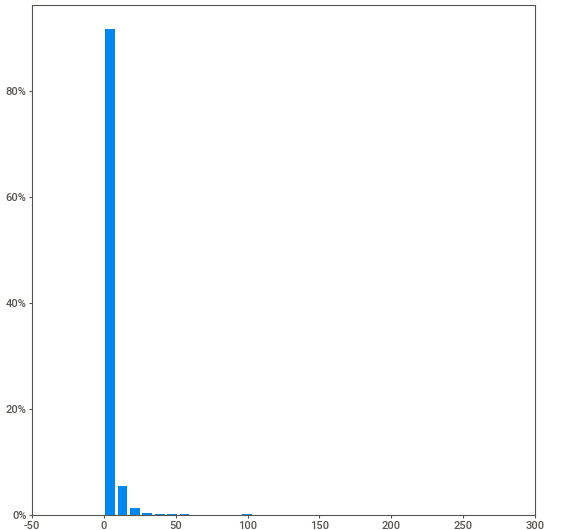
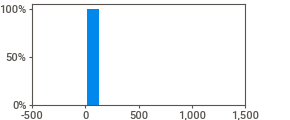
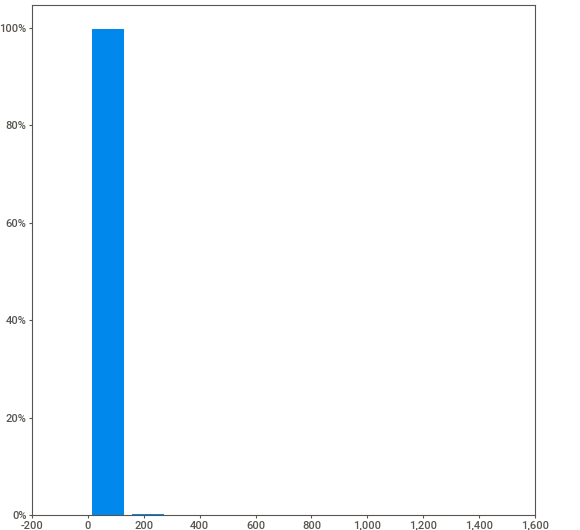
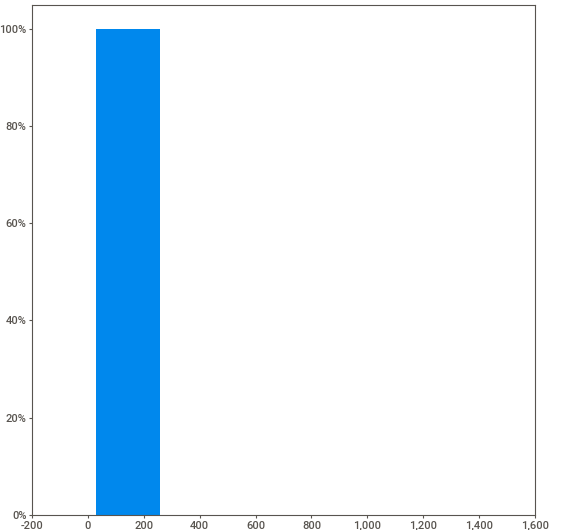
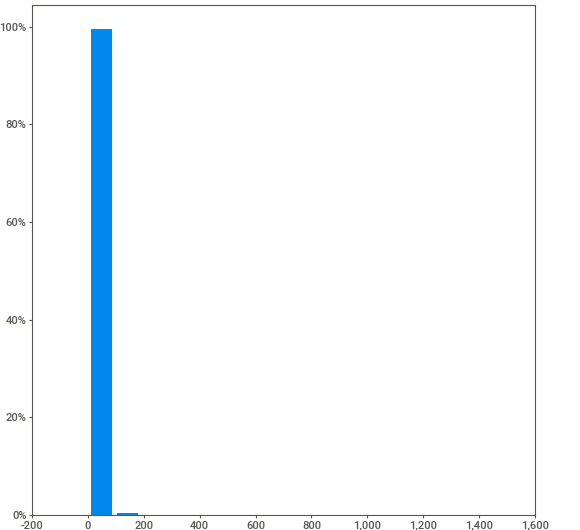
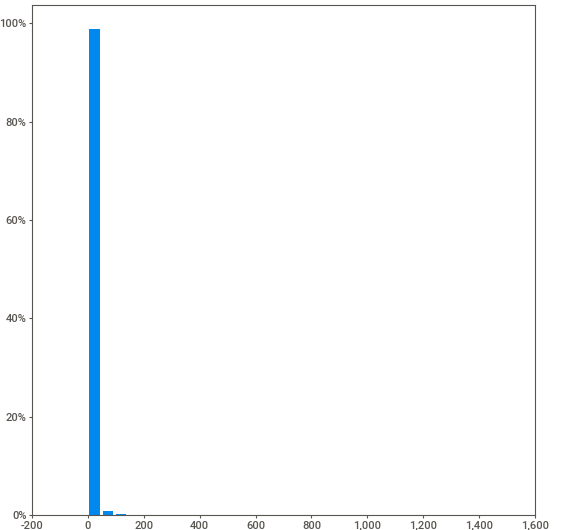
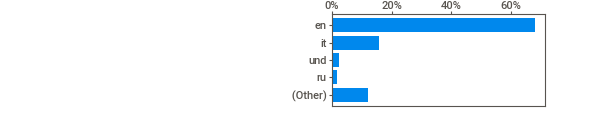
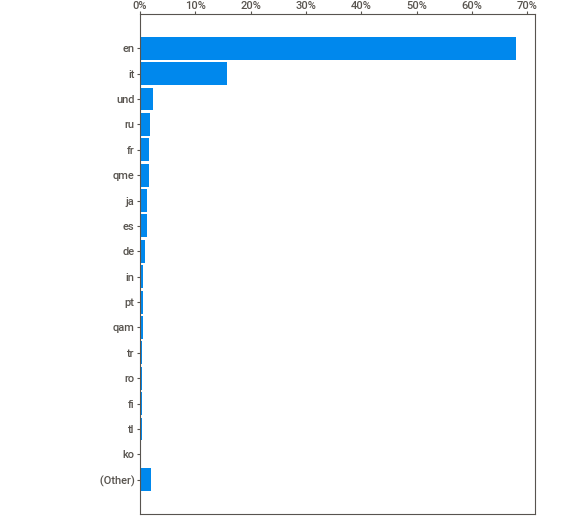
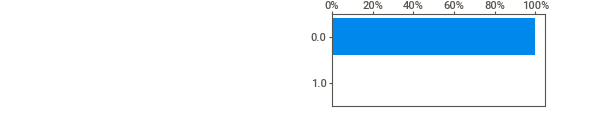
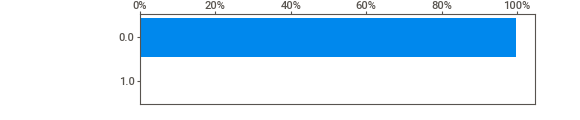
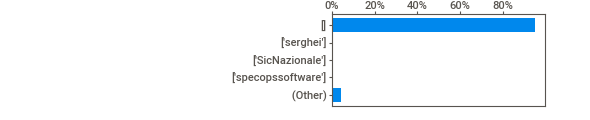
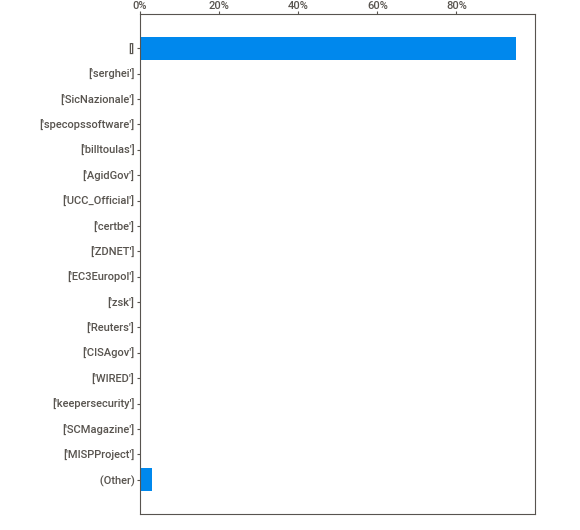
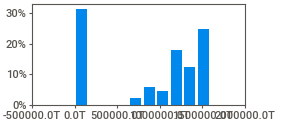
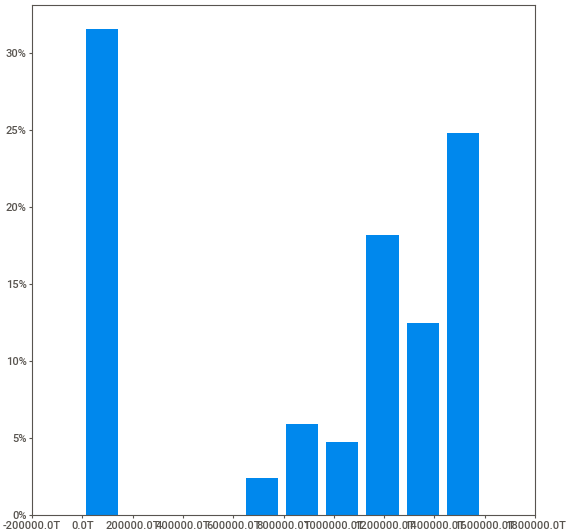
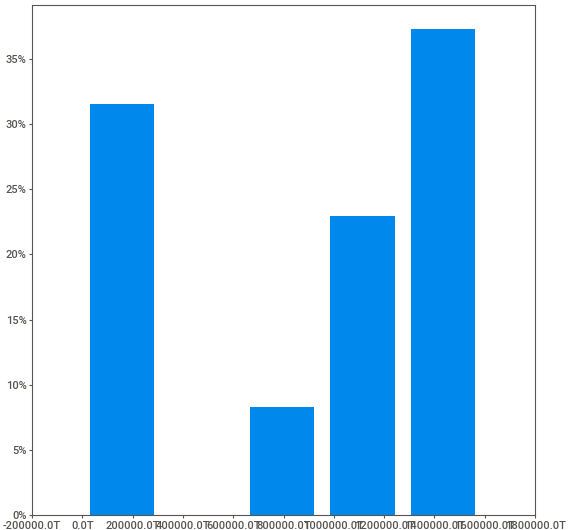
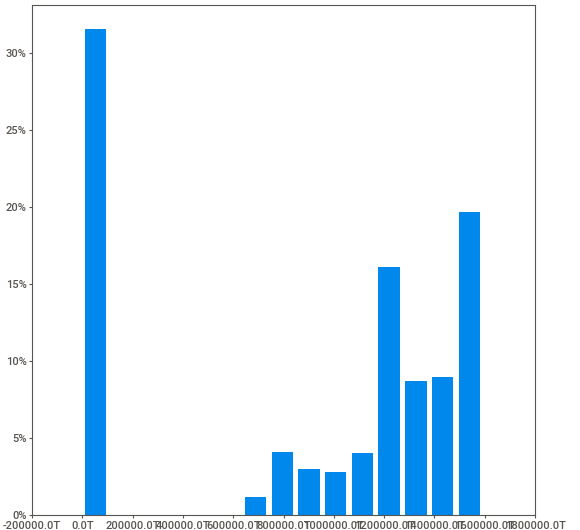
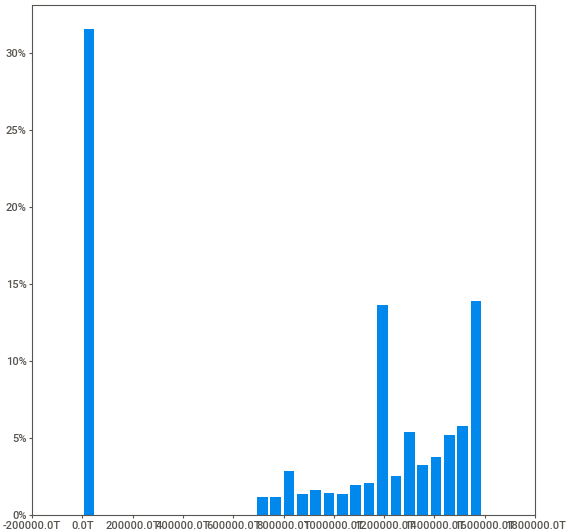
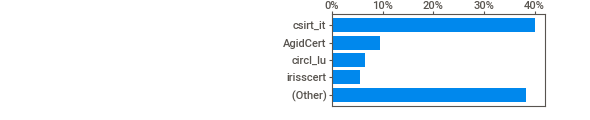
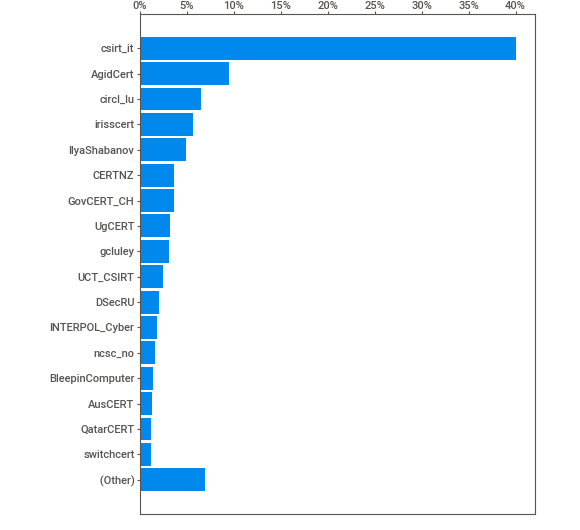
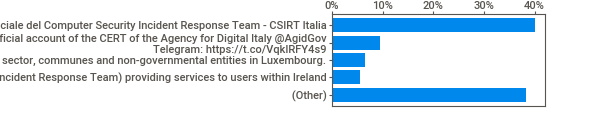
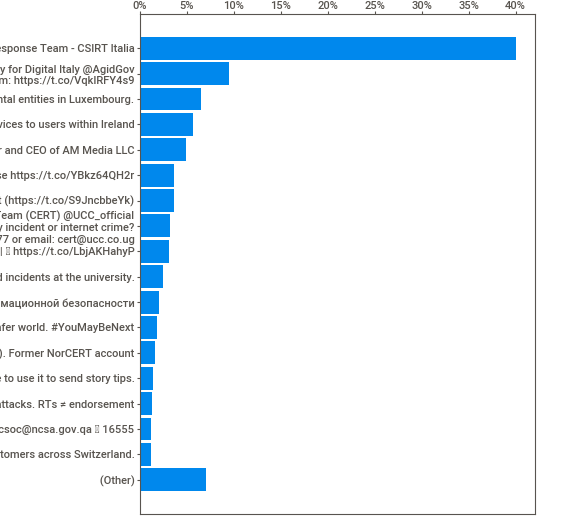
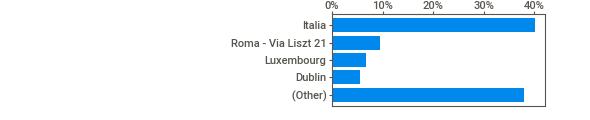
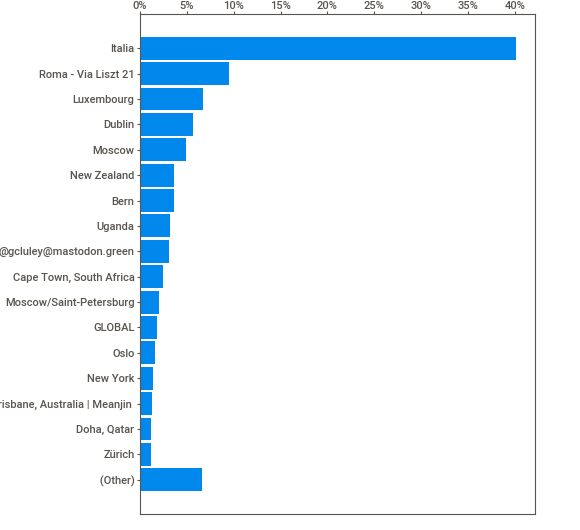
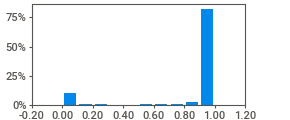
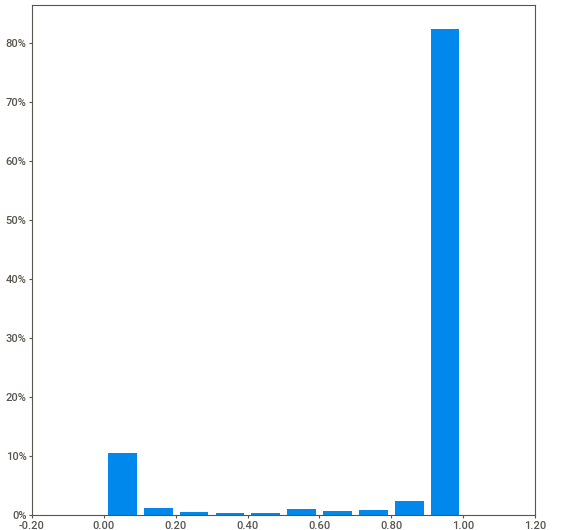
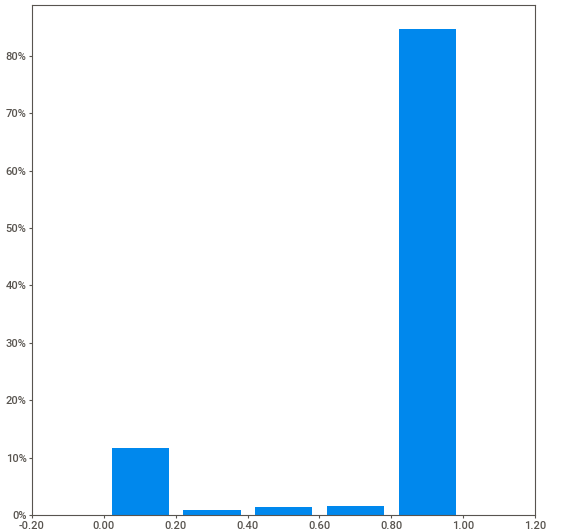
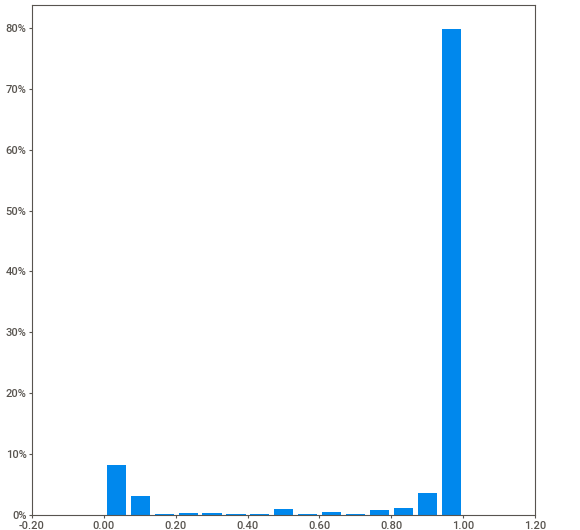
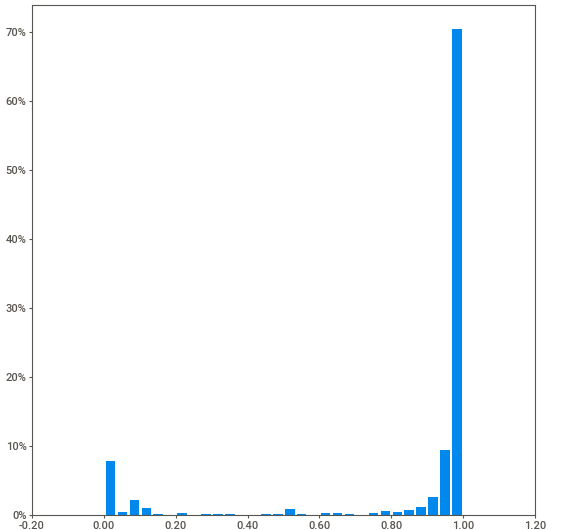
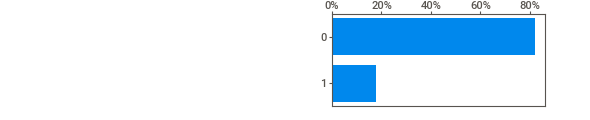
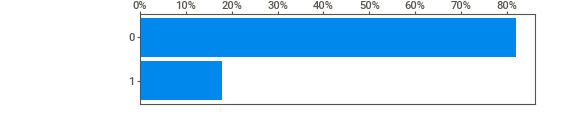
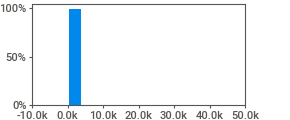
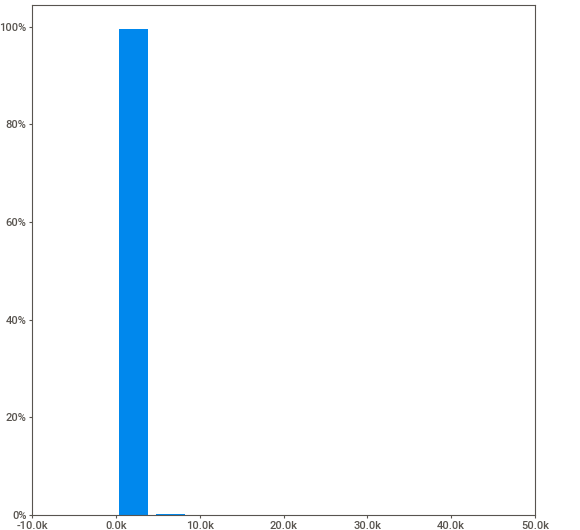
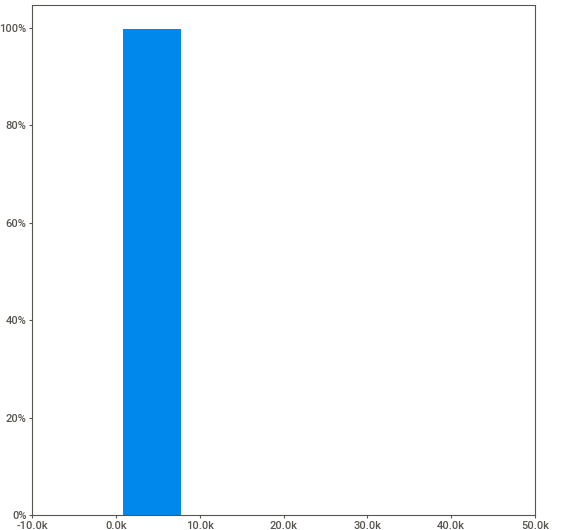
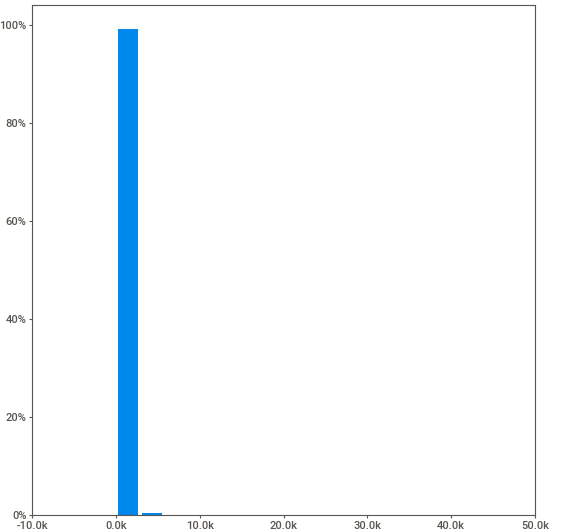
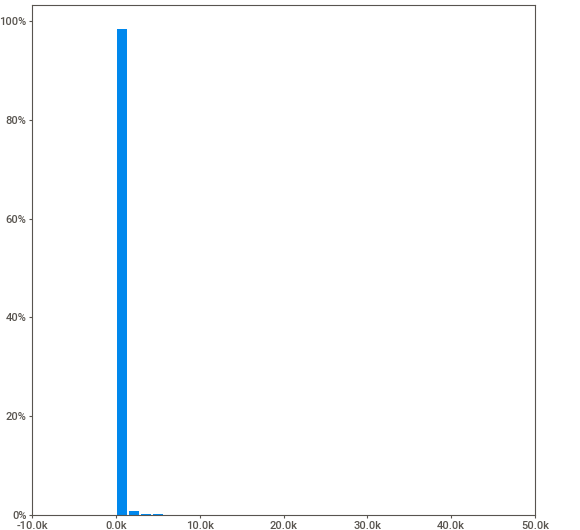
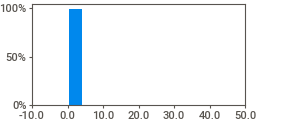
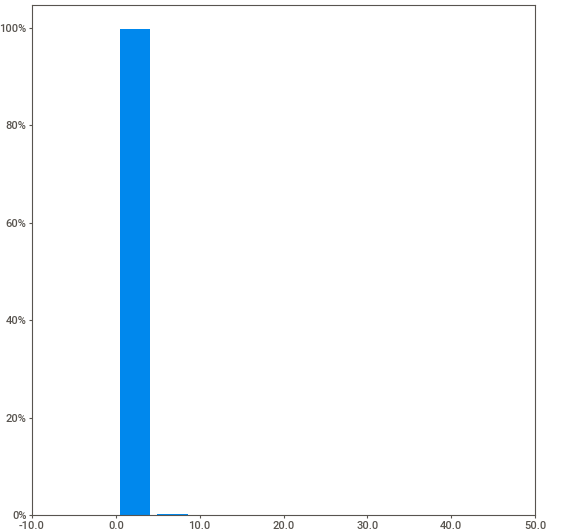
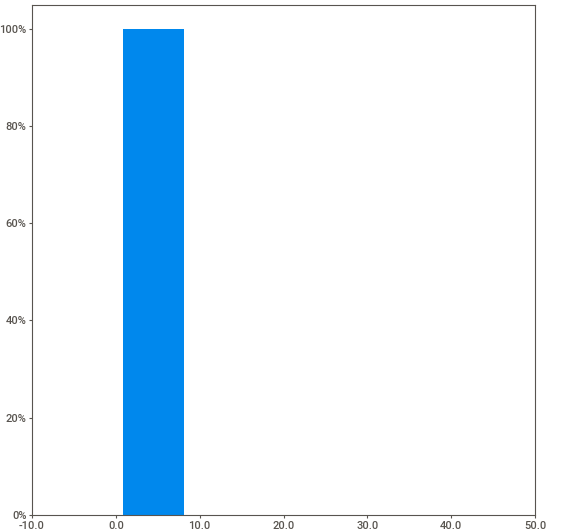
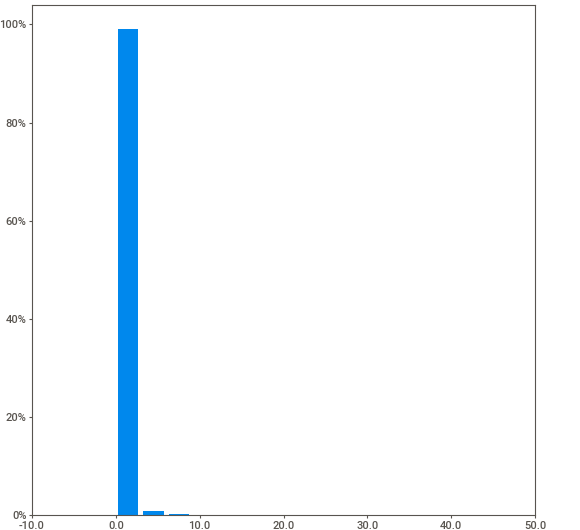
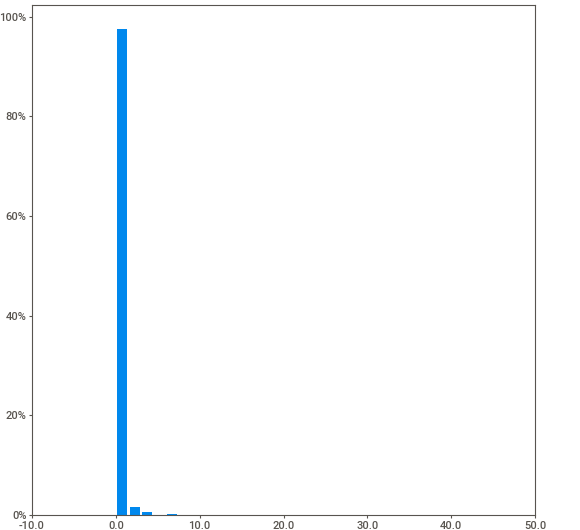
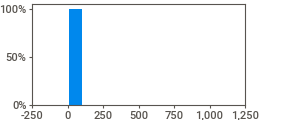
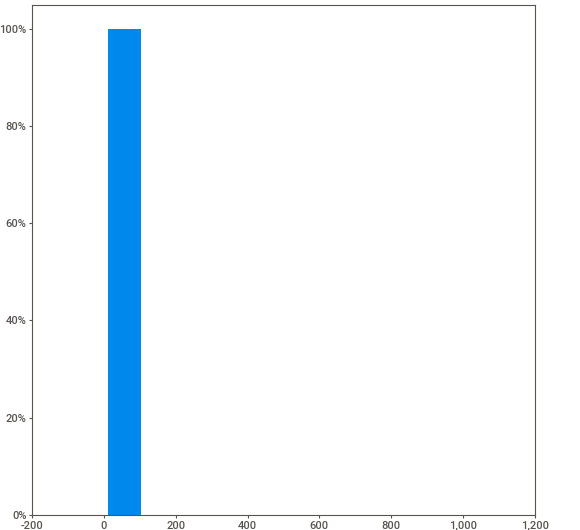
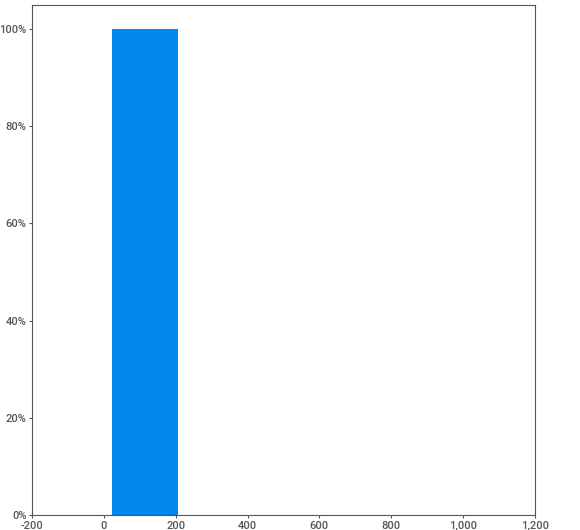
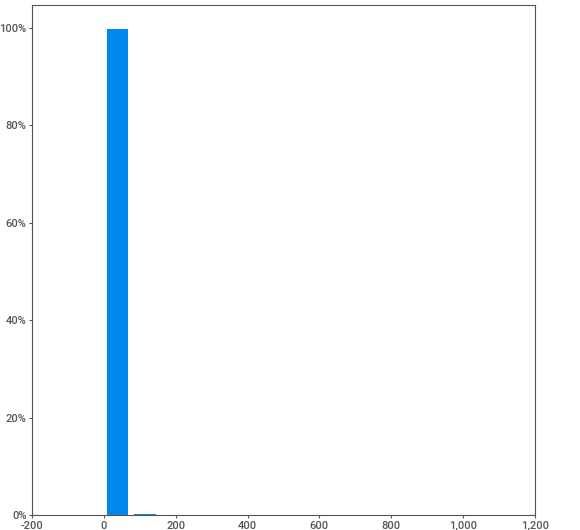
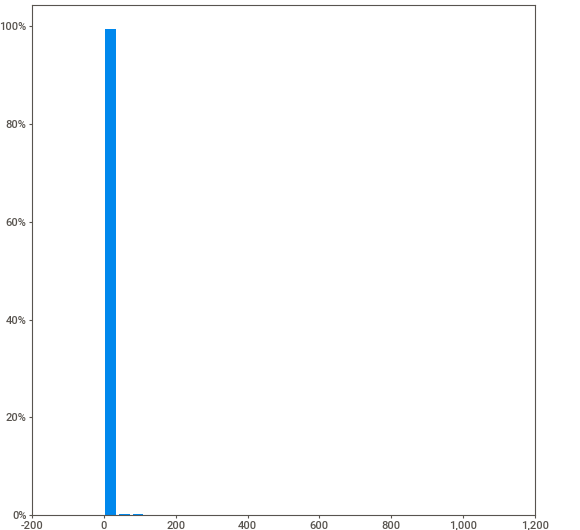
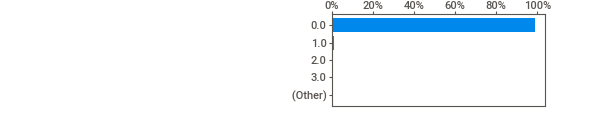
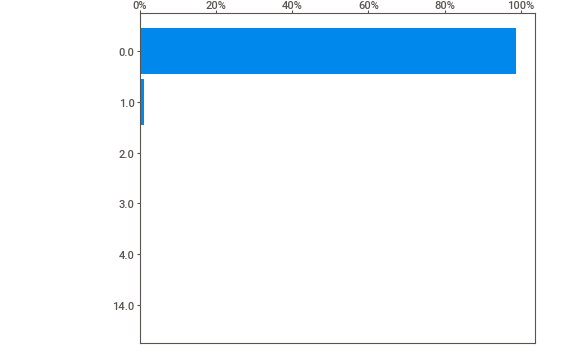
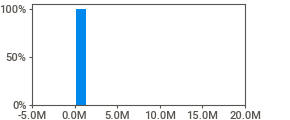
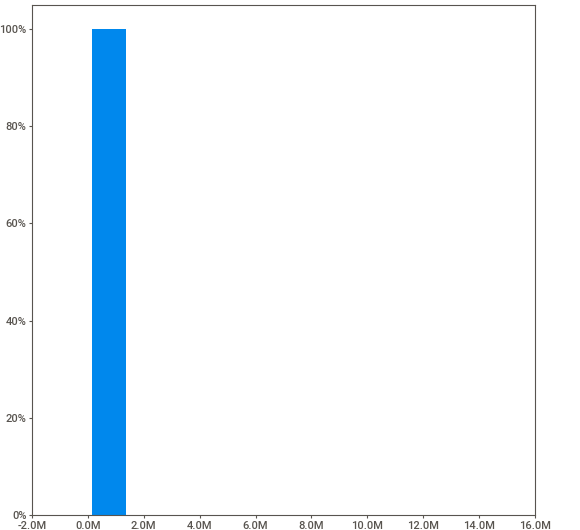
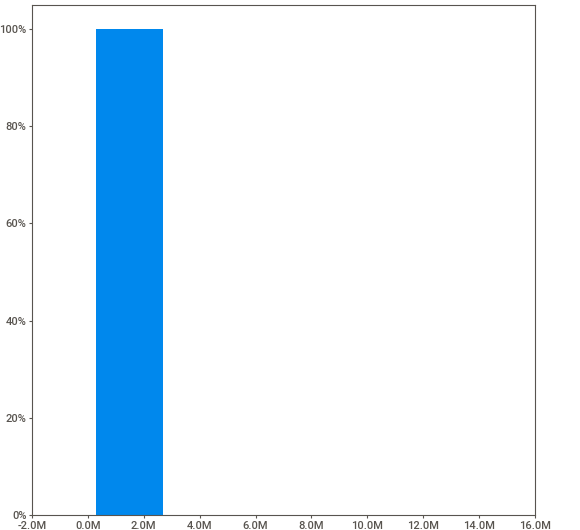
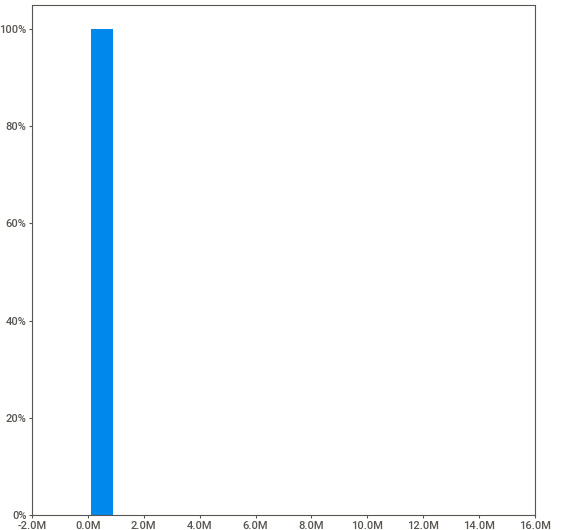
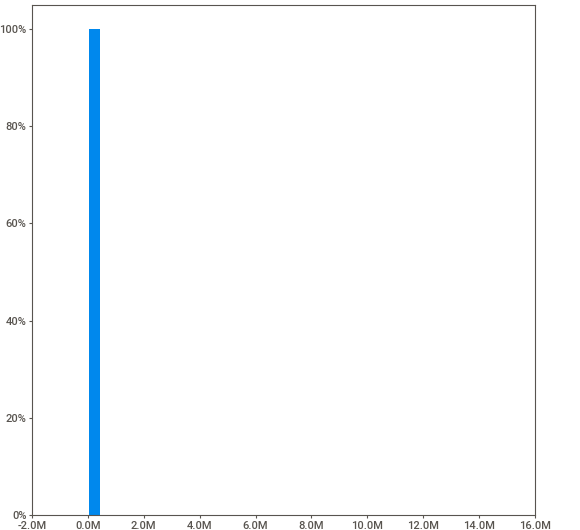
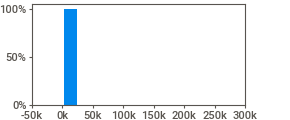
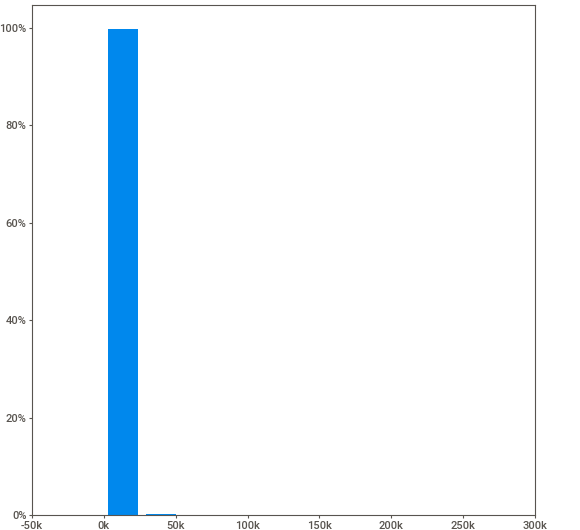
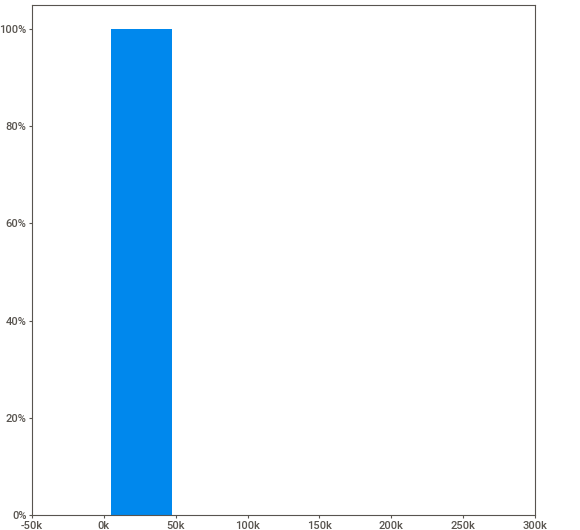
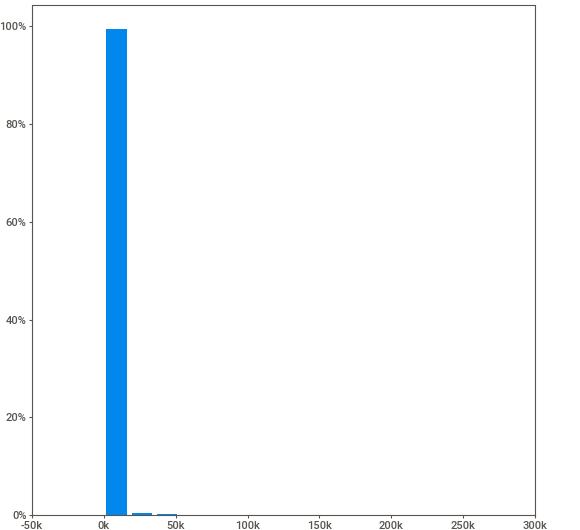
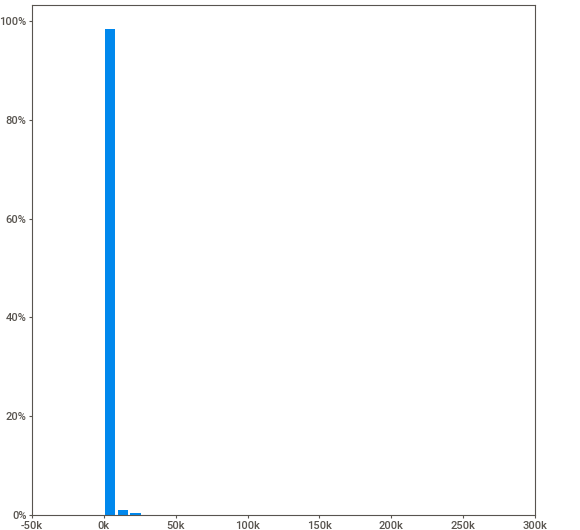
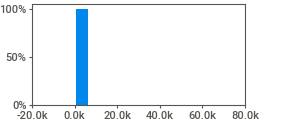
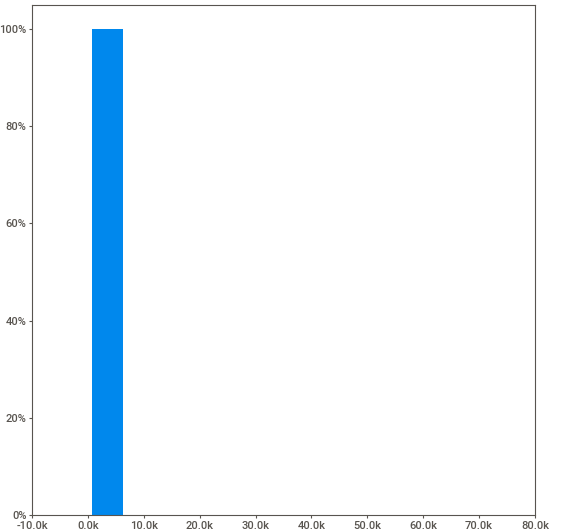
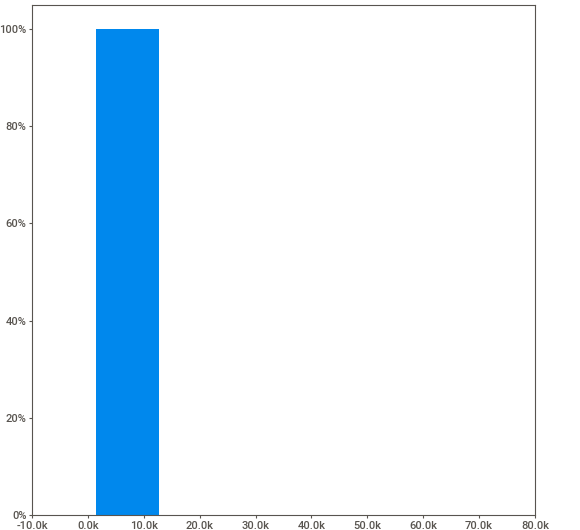
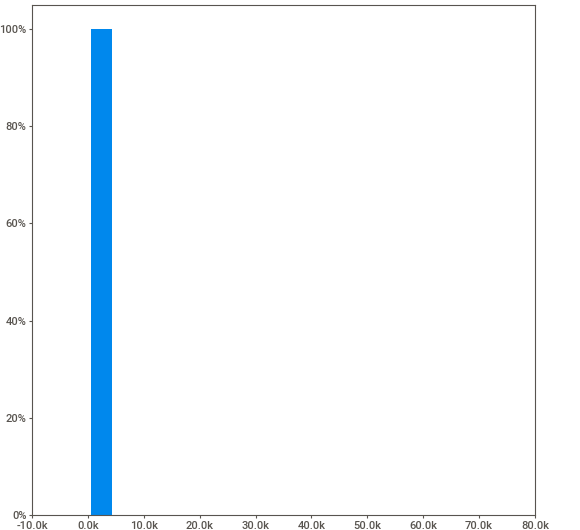
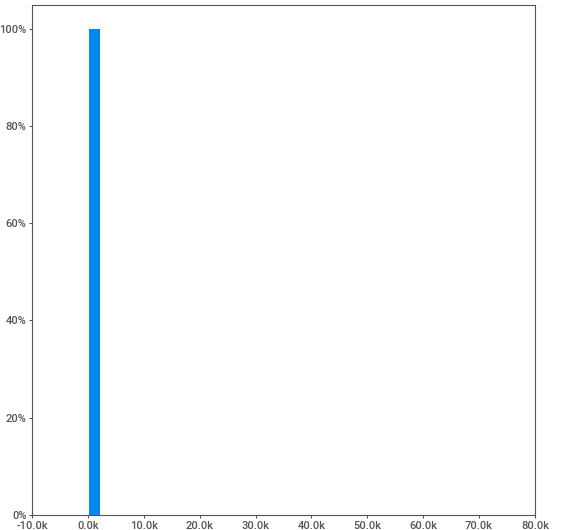
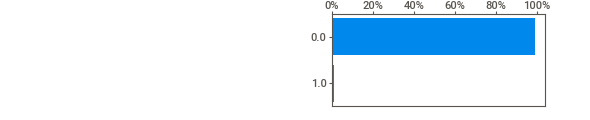
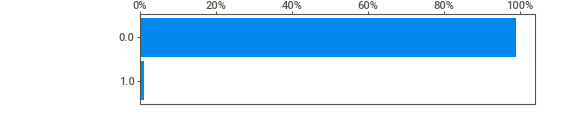
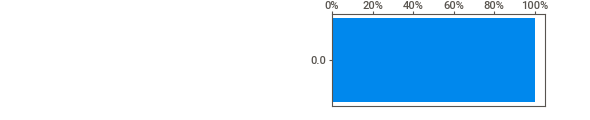
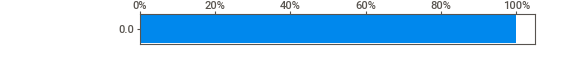
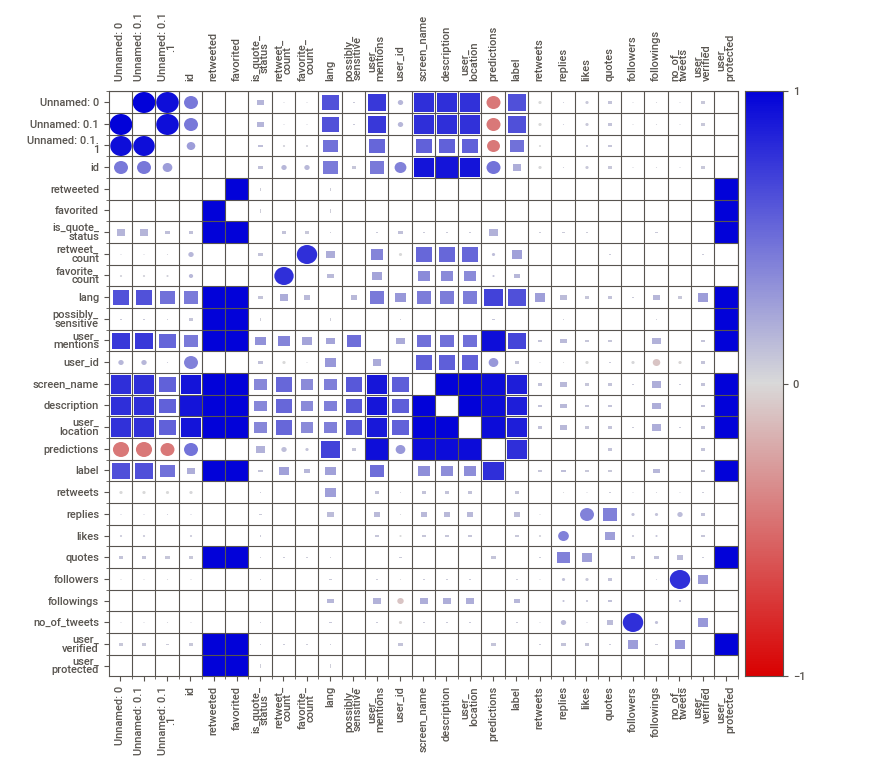
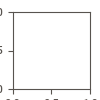

In [7]:
data = data.drop_duplicates(subset=['full_text_clean'])
data.reset_index(inplace=True, drop=True)
sweet_report = sv.analyze(data)
sweet_report.show_notebook()


In [8]:
# Group the data by user_id and count the number of rows in each group
grouped_data = data.groupby('user_id').size().reset_index(name='count')

In [9]:
# Sort the groups by count in descending order
sorted_groups = grouped_data.sort_values('count', ascending=False)

In [10]:
sorted_groups

,user_id,count
2962,1192510000000000000,1153
3262,1273940000000000000,274
452,184762389,187
234,56187579,161
395,137795216,141
...,...,...
2196,921409682455105536,1
2195,921317908306972672,1
2194,921248655566401536,1
2193,920633531923075072,1


In [11]:
# Merge the sorted groups with the original data on user_id
sorted_data = pd.merge(sorted_groups, data, on='user_id')
sorted_data

,user_id,count,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,created_at,full_text,retweeted,favorited,...,likes,quotes,username,user_creation,followers,followings,no_of_tweets,user_verified,user_protected,full_text_clean
0,1192510000000000000,1153,1,1,1,1.310000e+18,Wed Sep 23 16:08:14 +0000 2020,Rilevate nuove versioni dell’email utilizzata ...,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rilevate nuove versioni utilizzata campagna ma...
1,1192510000000000000,1153,2,2,2,1.330000e+18,Wed Nov 18 16:25:02 +0000 2020,Individuate due vulnerabilità #0day nel softwa...,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,individuate vulnerabilit day software cisco se...
2,1192510000000000000,1153,3,3,3,1.370000e+18,Wed Mar 03 09:49:20 +0000 2021,Sfruttate 4 vulnerabilità #0day per violare se...,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sfruttate vulnerabilit day violare server exch...
3,1192510000000000000,1153,5,5,5,1.350000e+18,Tue Jan 26 16:49:41 +0000 2021,Campagna di attacchi che sfrutta diverse vulne...,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,campagna attacchi sfrutta vulnerabilit inietta...
4,1192510000000000000,1153,6,6,6,1.560000e+18,Fri Aug 12 09:57:35 +0000 2022,#FBI e #CISA hanno pubblicato un Cybersecurity...,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fbi cisa pubblicato cybersecurity advisory csa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10016,921409682455105536,1,11082,11082,7798,1.591498e+18,2022-11-12T18:27:31.000Z,Aradan sonra art arda 3 mağlubiyet alacağımızı...,NaN,NaN,...,0.0,0.0,mustafaercuu,2017-10-20T16:16:02.000Z,129.0,259.0,0.0,0.0,0.0,aradan art arda lubiyet alaca bilmeyen kendine...
10017,921317908306972672,1,11922,11922,8638,1.591498e+18,2022-11-12T18:28:04.000Z,@LipiMohanty15 ମୁଁ ପୁରୁଣା User 😜,NaN,NaN,...,1.0,0.0,Subha_Odisha,2017-10-20T10:11:21.000Z,1299.0,73.0,1.0,0.0,0.0,lipimohanty user
10018,921248655566401536,1,7012,7012,3728,1.591497e+18,2022-11-12T18:24:12.000Z,@urban_aykal @basz_berlin @SenUMVKBerlin auf w...,NaN,NaN,...,11.0,0.0,jens_blume,2017-10-20T05:36:10.000Z,2553.0,768.0,31.0,0.0,0.0,urban aykal basz berlin senumvkberlin art weis...
10019,920633531923075072,1,8930,8930,5646,1.591498e+18,2022-11-12T18:25:47.000Z,RT @RichardMunang: Turning Fast Fashion into O...,NaN,NaN,...,0.0,0.0,Prof_Owiti,2017-10-18T12:51:53.000Z,5819.0,6386.0,3.0,0.0,0.0,rt richardmunang fast fashion opportunity africa


In [12]:
num_singletons = len(sorted_data[sorted_data['count'] >= 2] )
print(f"There are {num_singletons} rows where the count >= 2.")

# Filter the rows where count is greater than 2
filtered_data = sorted_data[sorted_data['count'] >= 2]

print("Filtered dataframe:")
print(filtered_data)

num_singletons = len(filtered_data[filtered_data['label'] == 1])

print(f"There are {num_singletons} rows where the label = 1.")


num_singletons = len(filtered_data[filtered_data['label'] == 1])

print(f"There are {num_singletons} rows where the label = 1.")


There are 4413 rows where the count >= 2.
Filtered dataframe:
                  user_id  count  Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
0     1192510000000000000   1153           1             1               1   
1     1192510000000000000   1153           2             2               2   
2     1192510000000000000   1153           3             3               3   
3     1192510000000000000   1153           5             5               5   
4     1192510000000000000   1153           6             6               6   
...                   ...    ...         ...           ...             ...   
4408             43556787      2       12821         12821            9537   
4409  1591445768317157120      2        4763          4763            1479   
4410  1591445768317157120      2        5488          5488            2204   
4411             20337517      2        8608          8608            5324   
4412             20337517      2       12508         12508            9224   

 

In [13]:
frequent_users = pd.DataFrame(filtered_data,columns=['user_id','full_text_clean'])
frequent_users.to_csv('data_to_user_em.txt',header=0,sep=" ",index=None)
frequent_users.to_excel('data_to_user_em.xlsx', encoding = 'utf-8-sig')

analysis of data


In [14]:
test5 = pd.read_excel('/kaggle/input/test5-labeled/test5_all.xlsx')
labeled_data = pd.read_excel('/kaggle/input/labeled-data/labeled_data.xlsx')

In [15]:
labeled_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'tweetid', 'author_id', 'full_text',
       'label', 'lang', 'created_at', 'geo', 'retweets', 'replies', 'likes',
       'quotes', 'location', 'full_text_clean', 'predictions', 'id',
       'retweeted', 'favorited', 'is_quote_status', 'retweet_count',
       'favorite_count', 'in_reply_to_status_id', 'in_reply_to_user_id',
       'place', 'coordinates', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'urls', 'user_id', 'screen_name', 'description',
       'user_location', 'is_a_reply', 'username', 'user_creation', 'followers',
       'followings', 'no_of_tweets', 'user_verified', 'user_protected',
       'Unnamed: 0.1.1'],
      dtype='object')

In [16]:
labeled_data['author_id'][0]

1.606060650547106e+18

In [17]:
data = pd.concat([test5, labeled_data], axis=0,ignore_index=True)
data['author_id'] = data['author_id'].fillna(-1).astype(int)
data.reset_index(drop=True)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetid,author_id,full_text,label,lang,created_at,geo,...,description,user_location,is_a_reply,username,user_creation,followers,followings,no_of_tweets,user_verified,user_protected
0,0,0,2729.0,1.628442e+18,39302152,CVEnew: CVE-2021-4326 A vulnerability in Imper...,1,en,2023-02-22T17:11:57.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4960.0,1.628444e+18,958005194398289920,New post from https://t.co/9KYxtdZjkl (CVE-201...,1,en,2023-02-22T17:16:26.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,4954.0,1.628444e+18,955014888446939136,New post from https://t.co/uXvPWJy6tj (CVE-201...,1,en,2023-02-22T17:16:25.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,3281.0,1.628443e+18,429580982,#Cisco NX-OS Software CLI Command Injection #v...,1,en,2023-02-22T17:13:05.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,1637.0,1.628442e+18,1322315722287099904,CVE-2023-21839 #Vulnerability for @Oracle #Web...,1,en,2023-02-22T17:09:26.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14137,13914,17,307.0,1.624428e+18,1143668895691227008,@brunovdk1 @generalorthomd @SSittonMD @NuelleS...,0,en,2023-02-11T15:20:12.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14138,13915,18,156.0,1.624428e+18,40097592,RT @thefatdoctoruk: Here are some of the many ...,0,en,2023-02-11T15:19:52.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14139,13916,19,23.0,1.624421e+18,1396204012412669952,@Neil_Druckmann Glad we got that moment. Glad ...,0,en,2023-02-11T14:53:30.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14140,13917,20,347.0,1.624428e+18,87333002,@IanCopeland5 I'm anti experimental vaccine li...,0,en,2023-02-11T15:20:17.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'tweetid', 'author_id',
       'full_text', 'label', 'lang', 'created_at', 'geo', 'retweets',
       'replies', 'likes', 'quotes', 'location', 'full_text_clean',
       'predictions', 'Unnamed: 5', 'id', 'retweeted', 'favorited',
       'is_quote_status', 'retweet_count', 'favorite_count',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'place', 'coordinates',
       'possibly_sensitive', 'hashtags', 'user_mentions', 'urls', 'user_id',
       'screen_name', 'description', 'user_location', 'is_a_reply', 'username',
       'user_creation', 'followers', 'followings', 'no_of_tweets',
       'user_verified', 'user_protected'],
      dtype='object')

> keywords used to download the tweet steam

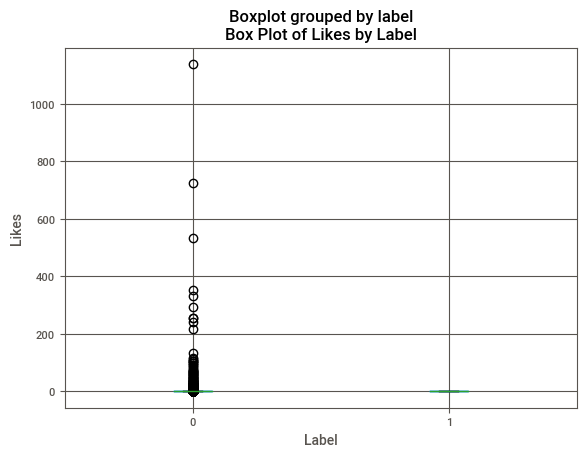

In [19]:
# Create box plot of likes by label
data.boxplot(column='likes', by='label')

# Add title and labels
plt.title('Box Plot of Likes by Label')
plt.xlabel('Label')
plt.ylabel('Likes')

# Show plot
plt.show()

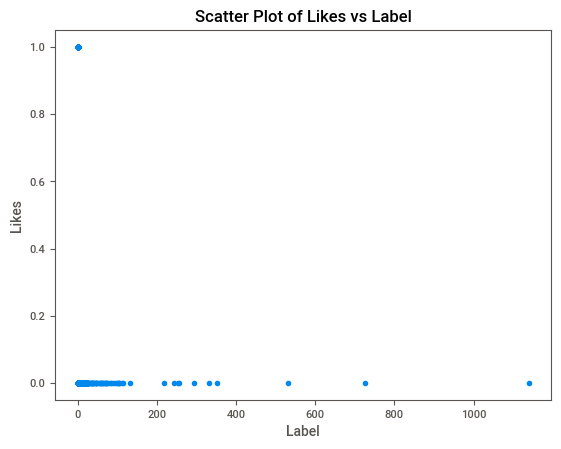

In [20]:
# Create scatter plot of likes vs label
plt.scatter(data['likes'], data['label'])

# Add title and labels
plt.title('Scatter Plot of Likes vs Label')
plt.xlabel('Label')
plt.ylabel('Likes')

# Show plot
plt.show()

In [21]:
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,tweetid,author_id,full_text,label,lang,created_at,geo,...,description,user_location,is_a_reply,username,user_creation,followers,followings,no_of_tweets,user_verified,user_protected
0,0,0,2729.0,1.628442e+18,39302152,CVEnew: CVE-2021-4326 A vulnerability in Imper...,1,en,2023-02-22T17:11:57.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,4960.0,1.628444e+18,958005194398289920,New post from https://t.co/9KYxtdZjkl (CVE-201...,1,en,2023-02-22T17:16:26.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,4954.0,1.628444e+18,955014888446939136,New post from https://t.co/uXvPWJy6tj (CVE-201...,1,en,2023-02-22T17:16:25.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,3281.0,1.628443e+18,429580982,#Cisco NX-OS Software CLI Command Injection #v...,1,en,2023-02-22T17:13:05.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,1637.0,1.628442e+18,1322315722287099904,CVE-2023-21839 #Vulnerability for @Oracle #Web...,1,en,2023-02-22T17:09:26.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14137,13914,17,307.0,1.624428e+18,1143668895691227008,@brunovdk1 @generalorthomd @SSittonMD @NuelleS...,0,en,2023-02-11T15:20:12.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14138,13915,18,156.0,1.624428e+18,40097592,RT @thefatdoctoruk: Here are some of the many ...,0,en,2023-02-11T15:19:52.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14139,13916,19,23.0,1.624421e+18,1396204012412669952,@Neil_Druckmann Glad we got that moment. Glad ...,0,en,2023-02-11T14:53:30.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14140,13917,20,347.0,1.624428e+18,87333002,@IanCopeland5 I'm anti experimental vaccine li...,0,en,2023-02-11T15:20:17.000Z,{},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
data['full_text_clean'][0]

'cvenew cve vulnerability imperative framework privileged actor execute arbitrary command plugin install update command maliciously formed environment variable impact zowe cli'

In [23]:
keywords = [
    'sql injection'    , 'code execution' , 'DoS Attack' , 'exploit' , 'Hacker','remote', 'code',  'vulnerability', 'cybersecurity',
    'IT Security', 'malware' , 'MTTR' , 'patch' , 'penetration testing','phishing' , 'ransomware' , 'red team' ,'risk' , 'threat' , 'security programs'
]
# to be checked also this set of keywords
second_stub_dict = ['sql injection','code execution','remote code',
                    'privilege escalation','buffer overflow','arbitrary code',
                    'injection vulnerability','injection','command injection','execute arbitrary','remote attacker',
                    'execution vulnerability','execution','remote attackers','allows remote','critical cve',
                    'medium https','cve detected','out-of-bounds write','overflow vulnerability',
                    'cross-site scripting','privilege vulnerability','escalation vulnerability','escalation',
                    'write vulnerability','patches critical','injection attack','use-after-free vulnerability',
                    'execution vulnerabilities','injection vulnerabilities','injection attacks','integer overflow',
                    'code injection','execution privileges','authenticated attacker','out-of-bounds read',
                    'malicious code','remote code execution','sql injection type','code execution vulnerability','code execution',
                    'sql injection vulnerability','execute arbitrary code','arbitrary code execution',
                    'critical cve','critical cve detected','command injection',
                    'allows remote attackers','remote attackers','local privilege escalation','vulnerability allows attackers',
                    'buffer overflow vulnerability','heap-based buffer overflow','heap buffer overflow',
                    'privilege escalation','vulnerability allows remote',
                    'arbitrary code','exploit heap corruption','exploit heap','stack-based buffer overflow',
                    'injection vulnerability exists','cross-site request forgery','out-of-bounds write vulnerability',
                    'sql injection attack','unauthenticated remote attacker','code execution vulnerabilities',
                    'overflow vulnerability exists','privilege escalation in','specially-crafted http request',
                    'sql injection attacks','unauthenticated remote code', 'remote code','stack overflow','buffer overflow',
                    'remote attackers','payload injected']

In [24]:
# a single keyword list out of 2

keyword_list = list(set(keywords + second_stub_dict))
print(keyword_list)
keyword_list = list(set(keyword_list))
list_length = len(keyword_list)
print("Length of the list is:", list_length)



['threat', 'red team', 'sql injection type', 'exploit heap corruption', 'specially-crafted http request', 'allows remote', 'overflow vulnerability exists', 'injection', 'security programs', 'write vulnerability', 'sql injection vulnerability', 'out-of-bounds write', 'exploit heap', 'exploit', 'remote code execution', 'allows remote attackers', 'vulnerability allows remote', 'unauthenticated remote attacker', 'injection attack', 'command injection', 'arbitrary code', 'cve detected', 'malware', 'code injection', 'injection vulnerability', 'buffer overflow', 'medium https', 'code', 'malicious code', 'IT Security', 'injection attacks', 'execution vulnerability', 'privilege escalation', 'heap-based buffer overflow', 'cybersecurity', 'phishing', 'vulnerability', 'execution vulnerabilities', 'escalation vulnerability', 'cross-site scripting', 'patches critical', 'DoS Attack', 'injection vulnerability exists', 'critical cve', 'critical cve detected', 'injection vulnerabilities', 'vulnerability

In [25]:
data['full_text_clean']

0        cvenew cve vulnerability imperative framework ...
1        cve librarian function php url server request ...
2        cve librarian function php url server request ...
3        cisco nx software cli command injection vulner...
4        cve vulnerability oracle weblogic affect funct...
                               ...                        
14137    brunovdk generalorthomd ssittonmd nuellesports...
14138    rt thefatdoctoruk reason prescribing weight lo...
14139    neil druckmann glad moment glad vulnerability ...
14140    iancopeland anti experimental vaccine vaccinat...
14141    neilstucky spread portfolio limit risk maximis...
Name: full_text_clean, Length: 14142, dtype: object

In [26]:
data[keyword]
for keyword in keyword_list:
    data[keyword] = data['full_text_clean'].str.contains(keyword, case=False).astype(float)


NameError: name 'keyword' is not defined

In [ ]:
data

In [ ]:
  
label_1_df = data[data['label'] == 1]

# calculate the sum of each keyword column for label 1 rows
keyword_sums_1 = label_1_df[keyword_list].sum()

# print the keyword sums
print(keyword_sums_1)

In [ ]:
label_0_df = data[data['label'] == 0]

# calculate the sum of each keyword column for label 1 rows
keyword_sums_0 = label_0_df[keyword_list].sum()

# print the keyword sums
print(keyword_sums_0)

In [ ]:
df0 = pd.DataFrame(keyword_sums_0, columns =['0'])
df1 = pd.DataFrame(keyword_sums_1, columns =['1'])
df0.shape

In [ ]:
df1.astype

In [ ]:
data_key = pd.concat([df0 ,df1], axis=1)
data_key

> he corr() function computes the Pearson correlation coefficient between pairs of columns in a dataframe.

In [ ]:
correlation = []
for keyword in keyword_list:
    corr = data['label'].corr(data[keyword])
    correlation.append(corr)
data_key['correlation'] = correlation
data_key

In [ ]:
data_key.dropna(subset = ['correlation'],inplace=True)
data_key

from 85 selected cyber security words, 35 didn't appear in any tweet. so they have no value practically. the remaining 50 we are analysing how useful they are for extraction of related info.

In [ ]:
data_key.shape

In [ ]:
corr = (data_key['1'] - data_key['0']) /(data_key['1'] + data_key['0'])
print(corr)
data_key['corr'] = corr

In [ ]:
data_key = data_key[data_key['correlation'] >= 0]  
print(data_key.shape)
data_key

In [ ]:
# Convert the DataFrame to a list
new_keys = data_key.index.tolist()

print(new_keys)